## Visitas por país (excluyendo brasil)

Vamos a analizar las visitas de la pagina en otros paises que no sean Brasil

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as npy

In [3]:
df = pd.read_csv('events.csv',low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [10]:
import geopandas as gpd

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

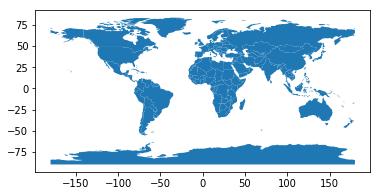

In [12]:
world.plot()
plt.show()

In [13]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [25]:
v = df.loc[df.event=='visited site'].loc[df.country!='Brazil']

In [27]:
grouped = v.groupby('country')

In [29]:
visitas_por_pais = grouped.agg({'person':'nunique'})

In [31]:
visitas_por_pais.sort_values('person',ascending=False).head()

,person
country,
Unknown,877
United States,322
Argentina,25
Canada,20
Netherlands,10


#### Ojo que hay un monton de unknown

In [17]:
world = world.set_index('name')

In [32]:
#uno los dos dataframe en uno (pero necesito que me quede un geodataframe asi que uso "brazil")
merged = world.join(visitas_por_pais)

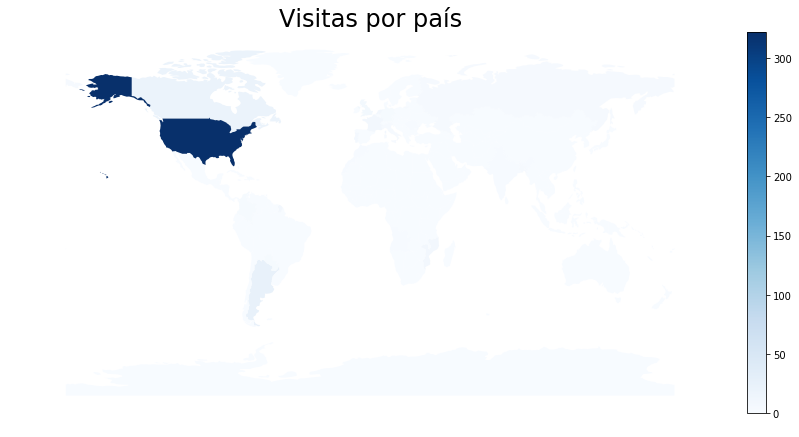

In [45]:
fig, ax = plt.subplots(1, figsize=(15, 7))
ax.axis('off')
plt.title('Visitas por país',size=24)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=322))
sm._A = []
cbar = fig.colorbar(sm)
merged.fillna(0).plot(column='person',cmap='Blues',ax=ax)

In [40]:
merged['person_log'] = npy.log(merged['person'])

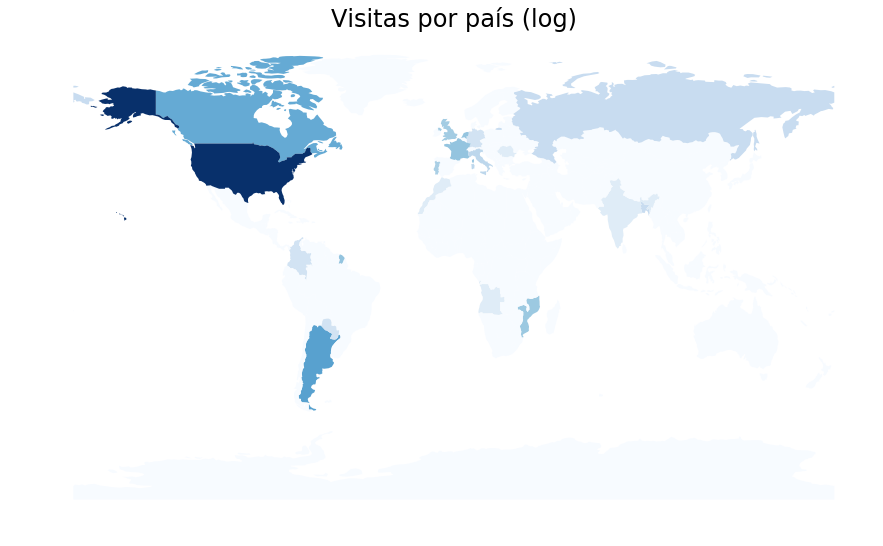

In [44]:
fig, ax = plt.subplots(1, figsize=(15, 9))
ax.axis('off')
plt.title('Visitas por país (log)',size=24)
merged.fillna(0).plot(column='person_log',cmap='Blues',ax=ax)

En este ultimo grafico se aprecia mejor de que paises vienen las personas que visitan la pagina afuera de Brasil.

## Ahora vamos a analizar si las personas que entraron desde EE.UU. sólamente lo hicieron desde ahí

In [56]:
personas = df.loc[df['event']=='visited site'].groupby('person')

In [57]:
def analisis (x):
    return ', '.join(sorted(x['country'].unique()))
paises = personas.apply(analisis)

In [60]:
paises.value_counts().head(10)

Brazil                   25568
Unknown                    635
United States              281
Brazil, Unknown            241
Brazil, United States       34
Argentina                   24
Canada                      10
Mozambique                   9
Brazil, Canada               6
Portugal                     6
dtype: int64

Vemos que la mayoria de las personas que visitaron desde EE.UU. solamente lo hicieron desde ese país